<a href="https://colab.research.google.com/github/kisanpawar/mscp/blob/main/Decision_Tree_for_the_Moons_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Accuracy Score: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       156
           1       0.99      0.93      0.96       144

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



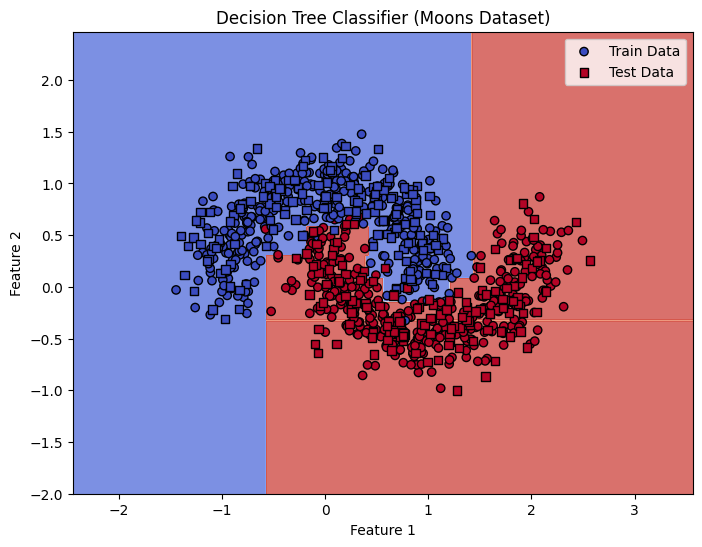

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Generate the moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
'max_depth': [3, 5, 10, 20, None], # Depth of the tree
'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
'min_samples_leaf': [1, 2, 4], # Minimum samples required to be at a leaf node
'criterion': ['gini', 'entropy'] # The function to measure the quality of a split
}
# Hyperparameter tuning using GridSearchCV





# Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1,
verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")
# Use the best model from GridSearchCV
best_dt = grid_search.best_estimator_
# Predict on the test set
y_pred = best_dt.predict(X_test)
# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Visualization of the decision boundary
# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
np.arange(y_min, y_max, 0.01))
Z = best_dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)




# Plot the points from the moons dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, marker='o',
edgecolors='k', label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='s',
edgecolors='k', label="Test Data")
plt.title('Decision Tree Classifier (Moons Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()